# Time series decomposition of the data cube

In [2]:
using CABLAB

In [7]:
c             = Cube("/Net/Groups/BGI/scratch/DataCube/v0.2.0/low-res/")
vars          = ["air_temperature_2m","soil_moisture","c_emissions"];
cdata         = getCubeData(c,latitude=(30,65), longitude=(-10,40),variable=vars); 

We want to decompose the time series into a signals of Trend, Seasonal cycle, low-frequency variations and high-frequency variantions. Here we use a Fourier-based approach by calling **filterTSFFT**. Before doing so, we need to do some gapFilling

In [8]:
cube_filled=mapCube(gapFillMSC,cdata);

In [10]:
xout=mapCube(filterTSFFT,cube_filled,no_ocean=1);

And we can plot the resulting decomposed time series

In [16]:
plotXY(xout,xaxis=TimeAxis,group="timescale",lon=35,lat=50.5,var=1)

In [17]:
import CABLAB.Proc.Stats.var
variance=reduceCube(var,xout,TimeAxis, no_ocean=1)

In-Memory data cube with the following dimensions
TimeScale           Axis with elements: Trend Long-Term Variability Annual Cycle Fast Oscillations 
Lon                 Axis with 200 Elements from -10.0 to 39.75
Lat                 Axis with 140 Elements from 65.0 to 30.25
Variable            Axis with elements: air_temperature_2m soil_moisture c_emissions 


Let's look at a map of the variability in the Trend signal to see where trends in air temperature are strongest.

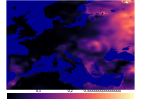

In [25]:
using PlotUtils
com = [cgrad(:magma)[x] for x in linspace(0,1,100)]
plotMAP(variance,timescale=1,var=1,colorm=com)

One can also check which areas have the strongest variance in the seasonal cycle

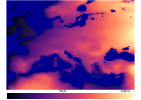

In [21]:
plotMAP(variance,timescale=3,var=1,colorm=com)